# Summer Olympics Data Analysis Assignment

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df=pd.read_csv("Summer.csv")

In [86]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [87]:
df.shape

(31165, 9)

In [88]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [89]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [91]:
df["Country"].unique()

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

In [92]:
df["Country"].isnull().sum()

4

In [93]:
df["Country"].value_counts()

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
SUD       1
BDI       1
TOG       1
AHO       1
BAR       1
Name: Country, Length: 147, dtype: int64

In [94]:
df["Country"]=df["Country"].fillna("USA")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31165 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [96]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [97]:
df["Country"].value_counts()

USA    4589
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
SUD       1
BDI       1
TOG       1
AHO       1
BAR       1
Name: Country, Length: 147, dtype: int64

## 1. In how many cities Summer Olympics is held so far?

In [98]:
City=df.groupby("City").apply(lambda x:x["Year"].unique()).to_frame().reset_index()
City.columns=["City","Year"]
City["Occurences"]=[len(c) for c in City["Year"]]
City.sort_values("Occurences",ascending=False)

,City,Year,Occurences
8,London,"[1908, 1948, 2012]",3
2,Athens,"[1896, 2004]",2
9,Los Angeles,"[1932, 1984]",2
15,Paris,"[1900, 1924]",2
0,Amsterdam,[1928],1
13,Moscow,[1980],1
20,Sydney,[2000],1
19,Stockholm,[1912],1
18,St Louis,[1904],1
17,Seoul,[1988],1


In [99]:
City.count()

City          22
Year          22
Occurences    22
dtype: int64

In [100]:
len(City["City"].unique())

22

In [101]:
len(df["City"].unique())

22

#### Ans 1.    22 Cities has held the Olympic so far 

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [102]:
gold_medal_sports=df[(df.Medal=="Gold")]
gold_medal_sports.Sport.value_counts().reset_index(name="Medal").head()

,index,Medal
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552


<AxesSubplot:xlabel='Sport'>

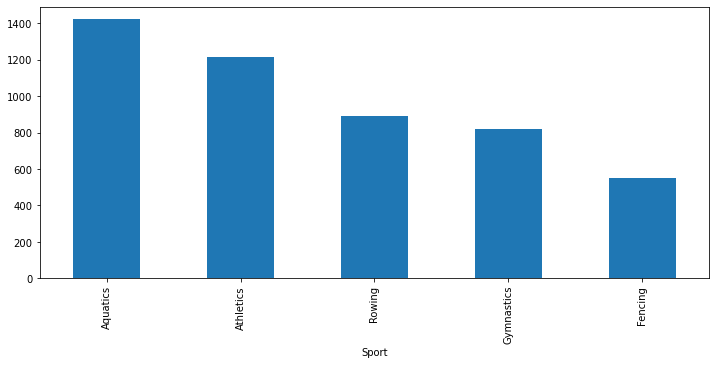

In [103]:
gold_medal_sports.groupby('Sport').count()['Medal'].sort_values(ascending=False).head(5).plot.bar(figsize=(12, 5))

#### Ans 2.   Top 5 Sport having most Gold Medal -: . Aquatics
####                                                                                 .Atheletics
####                                                                                 .Rowing
####                                                                                 .Gymnastics
####                                                                                  .Fencing

## 3. Which sport is having most number of medals so far? (Top 5)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


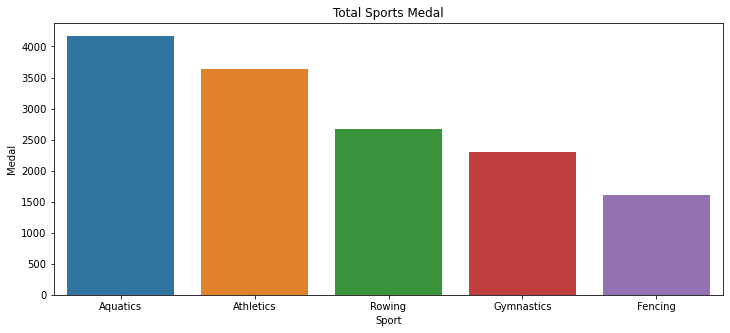

In [104]:
plt.figure(figsize=(12,5))
top_medal=df.groupby("Sport")["Medal"].count().nlargest(5).reset_index()
sns.barplot("Sport","Medal",data=top_medal)
plt.title("Total Sports Medal")
plt.show()

#### Ans 3. Top 5 Sports having most medal are:- . Aquatics
####    .Athletics
####    .Rowing
####    .Gymnastics
####    .Fencing

### 4. Which player has won most number of medals? (Top 5)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


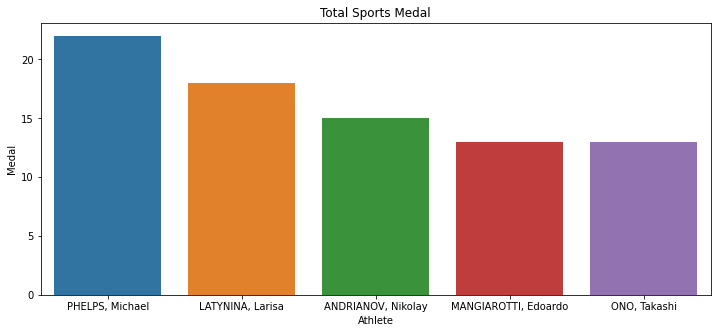

In [105]:
plt.figure(figsize=(12,5))
top_medal=df.groupby("Athlete")["Medal"].count().nlargest(5).reset_index()
sns.barplot("Athlete","Medal",data=top_medal)
plt.title("Total Sports Medal")
plt.show()

#### Ans 4. Top player to won most medals:- .PHELPS, Michael
#### . LATYNINA,Larisa
#### . ANDRIANOV, Nikolay
#### . MANGIAROTTI, Edoardo
#### . ONO, Takashi

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [106]:
gold_medal_player=df[(df.Medal=="Gold")]
gold_medal_player.Athlete.value_counts().reset_index(name="Medal").head(5)


,index,Medal
0,"PHELPS, Michael",18
1,"LEWIS, Carl",9
2,"SPITZ, Mark",9
3,"LATYNINA, Larisa",9
4,"NURMI, Paavo",9


<AxesSubplot:xlabel='Athlete'>

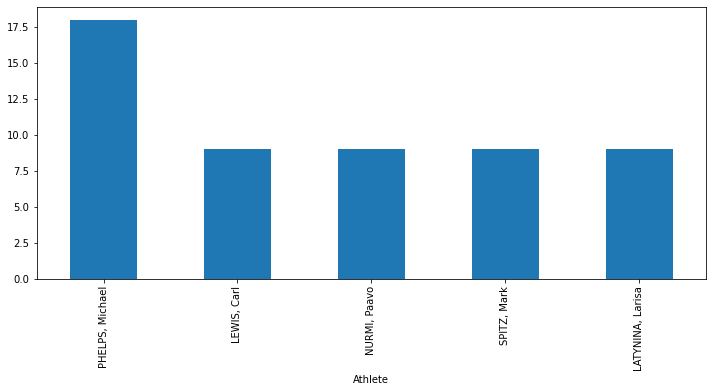

In [107]:
gold_medal_player.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(5).plot.bar(figsize=(12, 5))

#### Ans 5. Top 5 Player to won most GOLD Medal :-    .PHELPS, Michael	
####  .LATYNINA, Larisa	
####  .SPITZ, Mark	
####  .LEWIS, Carl	
####  .NURMI, Paavo

### 6. In which year India won first Gold Medal in Summer Olympics?

In [108]:
goldmedals_for_india = df[(df.Medal == 'Gold') & (df.Country == 'IND')]
goldmedals_for_india.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold


In [109]:
goldmedals_for_india.Year.min()

1928

#### Ans 6.  In 1928, INDIA has won its first Olympic GOLD Medal.

### 7. Which event is most popular in terms on number of players? (Top 5)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


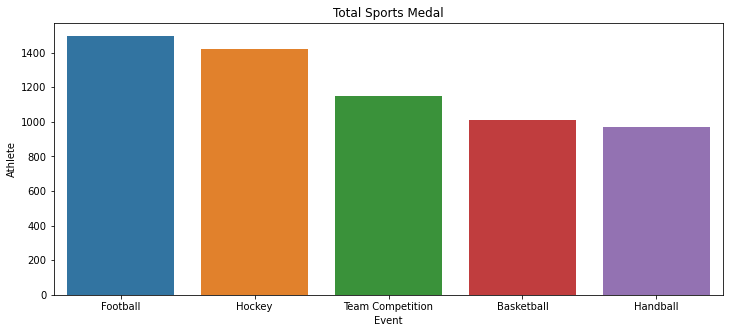

In [110]:
plt.figure(figsize=(12,5))
top_event=df.groupby("Event")["Athlete"].count().nlargest(5).reset_index()
sns.barplot("Event","Athlete",data=top_event)
plt.title("Total Sports Medal")
plt.show()

#### Ans 7. Most  Popular Event in terms of Player are: . Football
#### . Hockey
#### . Team Competition
#### . Basketball
#### . Handball

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [111]:
gold_medal_sports_women=df[(df.Gender=="Women")]
gold_medal_sports_women.Sport.value_counts().reset_index(name="Medal").head()

,index,Medal
0,Aquatics,1726
1,Athletics,1163
2,Gymnastics,799
3,Rowing,651
4,Volleyball,497


<AxesSubplot:xlabel='Sport'>

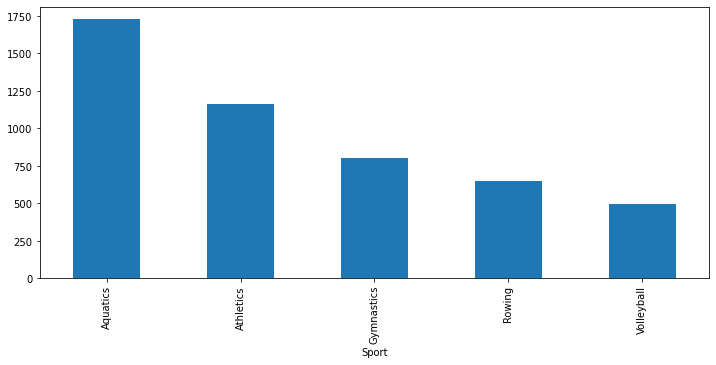

In [112]:
gold_medal_sports_women.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(12, 5))

#### Ans 8. Top 5 Sports having Most Female Gold Medalist:- . Aquatics
#### . Athletics
#### . Gymnastics
#### . Rowing
#### . Volleyball